In [2]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [3]:
#https://stats.oecd.org/SDMX-JSON/data/CITIES/AUS+AUS01+AUS02+AUS03+AUS04.POP_DEN_HINTER/all?startTime=2019&endTime=2021&contentType=csv&csv This url works
#The following API is for all USA metro areas in OECD cities database. 
urlmetro = 'https://stats.oecd.org/SDMX-JSON/data/CITIES/USA+USA01+USA02+USA03+USA04+USA05+USA06+USA07+USA08+USA09+USA10+USA11+USA12+USA13+USA14+USA15+USA16+USA17+USA18+USA19+USA20+USA21+USA22+USA23+USA24+USA25+USA26+USA27+USA28+USA29+USA30+USA31+USA32+USA33+USA34+USA35+USA36+USA37+USA38+USA39+USA40+USA41+USA42+USA43+USA44+USA45+USA46+USA47+USA48+USA49+USA50+USA51+USA52+USA53+USA54+USA55+USA56+USA57+USA58+USA59+USA60+USA61+USA62+USA63+USA64+USA65+USA66+USA67+USA68+USA69+USA70+USA71+USA72+USA73+USA74+USA75+USA76+USA77+USA78+USA79+USA80+USA81+USA82+USA83+USA84+USA85+USA86+USA87+USA88+USA89+USA90+USA91+USA92+USA93+USA94+USA95+USA96+USA97+USA98+USA99+USA100+USA101+USA102+USA103+USA104+USA105+USA106+USA107+USA108+USA109+USA110+USA111+USA112+USA113+USA114+USA115+USA116+USA117+USA118+USA119+USA120+USA121+USA122+USA123+USA124+USA125+USA126+USA127+USA128+USA129+USA130+USA131+USA132+USA133+USA134+USA135+USA136+USA137+USA138+USA139+USA140+USA141+USA142+USA143+USA144+USA145+USA146+USA147+USA148+USA149+USA150+USA151+USA152+USA153+USA154+USA155+USA156+USA157+USA158+USA160+USA161+USA162+USA170.POP_DEN+T_T+POP_TOT_GI+T_T_SH_NAT+T_Y15_64+EMP_RA_15_MAX+EMP_RA_15_MAX_GR_2007+GDP_REAL_PPP+GDP_SH_NAT+GDP_PC_REAL_PPP+EMP_IND_TOTAL+GDP_PW_REAL_PPP+XDSL+SPEX_25_CORE+TREECOVER_SHARE_CORE/all?startTime=2000&endTime=2021&contentType=csv&csv'
dfmetro = pd.read_csv(urlmetro)

['gdp_(million_usd,_constant_prices,_constant_ppp,_base_year_2015)'
 'population,_all_ages,_administrative_data'
 'population_of_the_metropolitan_area_as_a_share_of_the_national_population'
 'gdp_of_the_metropolitan_area_as_a_share_of_the_national_gdp'
 'gdp_per_capita_(usd,_constant_prices,_constant_ppp,_base_year_2015)'
 'population_density_(inhabitants_per_km2)' 'employment_at_place_of_work'
 'labour_productivity_(gdp_per_worker_in_usd,_constant_prices,_constant_ppp,_base_year_2015)'
 'growth/shrinking_index_of_the_total_population_(2001=100)'
 'working_age_population_group_(15-64)'
 'employment_rate_(employment_15+_over_population_15+)'
 'employment_rate_growth_index_(2007=100),_15_years_old_and_over'
 'share_of_households_having_access_to_adsl,_sdsl,_or_hdsl'
 'share_of_population_in_the_core_area_exposed_to_a_level_of_pm2.5_above_25_µg/m3'
 'tree_cover,_as_a_share_of_the_metropolitan_core_area']
89270.36419753087
87015.5


Index(['metro_id', 'metropolitan_areas', 'var', 'variables', 'time', 'year',
       'unit_code', 'unit', 'powercode_code', 'powercode',
       'reference_period_code', 'reference_period', 'value', 'flag_codes',
       'flags'],
      dtype='object')

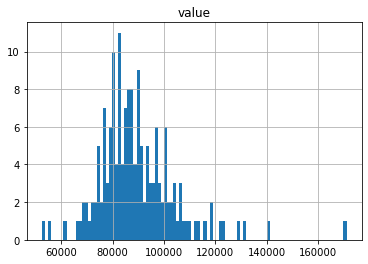

In [61]:
#Tidy up the column names and specific columns to make it easier to conduct analysis.
import matplotlib as plt
dfmetro.columns = dfmetro.columns.str.lower()
dfmetro.columns = dfmetro.columns.str.replace(' ', '_')
dfmetro.variables = dfmetro.variables.str.lower()
dfmetro.variables = dfmetro.variables.str.replace(' ', '_')

print(dfmetro.variables.unique())
h = dfmetro[(dfmetro['variables'] == 'labour_productivity_(gdp_per_worker_in_usd,_constant_prices,_constant_ppp,_base_year_2015)') & (dfmetro.year == 2018)]
h.hist(column='value',bins=100) #This shows that population density is not normally distributed with most of the data on the left handside of the distribution.
print(h.value.mean()) #The mean population density is 167.1
print(h.value.median()) #The median population density is 126.5
#WB data for the USA shows that population density (population per km2 of land) in 2020 was 36. Therefore, this dataset of cities is significantly larger than the country as a whole.
dfmetro.columns

<ipython-input-63-4518a3266f99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['diff_avg'] = ((x['value'] - x.value.median())/x.value.median())
<ipython-input-63-4518a3266f99>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff_avg'] = ((y['value'] - y.value.mean())/y.value.median())


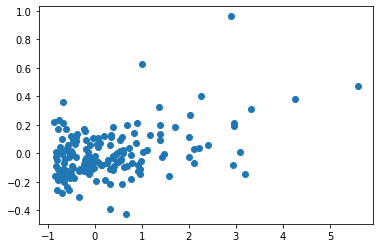

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = dfmetro[(dfmetro['variables'] == 'population_density_(inhabitants_per_km2)') & (dfmetro.year == 2018)]
x['diff_avg'] = ((x['value'] - x.value.median())/x.value.median())
y = dfmetro[(dfmetro['variables'] == 'labour_productivity_(gdp_per_worker_in_usd,_constant_prices,_constant_ppp,_base_year_2015)') & (dfmetro.year == 2019)]
y['diff_avg'] = ((y['value'] - y.value.mean())/y.value.median())
mdf = pd.merge(x,y,left_on='metro_id',right_on='metro_id')
plt.scatter(x=mdf['diff_avg_x'],y=mdf['diff_avg_y'])